# Исследование рынка игр
## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
    
### Цель: 
Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### План работ:
1. Открыть файл и изучить данные
2. Подготовить данные 
3. Провести исследовательский анализ данных
4. Составить портрет пользователя каждлго региона
5. Проверить гипотезы
6. Написать общий вывод 

# Оглавление<a name="Оглавление"></a>

- 1. [Предпоготовка данных](#Предпоготовка)
- 2. [Исследовательский анализ данных](#Исследовательский)
  - 2.1. [Вывод по годам](#Вывод_годам)
  - 2.2. [Вывод по времени жизни](#Вывод_времени)
  - 2.3. [Вывод по продажам](#Вывод_продажам)
  - 2.4. [Вывод по оценкам](#Вывод_оценкам)
  - 2.5. [Вывод по жанрам](#Вывод_жанрам)
  - 2.6. [Общий вывод по анализу данных](#Общий_анализу)
- 3. [Составление портрета пользователя каждого региона](#Составление)
  - 3.1. [Популярные платформы](#Популярные_платформы)
    - 3.1.1. [NA](#1)
    - 3.1.2. [EU](#2)
    - 3.1.3. [JP](#3)
  - 3.2. [Вывод по популярным платформам](#Вывод_платформам)
  - 3.3. [Популярные жанры](#Популярные_жанры)
    - 3.3.1 [NA](#11)
    - 3.3.2 [EU](#22)
    - 3.3.3 [JP](#33)
  - 3.4. [Вывод по популярным жанрам](#Вывод_жанрам)
  - 3.5. [Рейтинг ESRB](#Рейтинг_ESRB)
    - 3.5.1 [NA](#111)
    - 3.5.2 [EU](#222)
    - 3.5.3 [JP](#333)
  - 3.6. [Вывод по рейтингу](#Вывод_рейтингу)
- 4. [Проверка гипотез](#Проверка_гипотез)
  - 4.1. [Проверка первой гипотезы](#Проверка_первой)
   - 4.1.1. [Вывод по первой гипотезе](#первой)
  - 4.2. [Проверка второй гипотезы](#Проверка_второй)
   - 4.2.1. [Вывод по второй гипотезе](#второй)
- 5. [Общий вывод](#Общий_вывод)

## 1. Предпоготовка данных<a name="Предпоготовка"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [4]:
 data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Мы видим несоответвие между информацией в столбцах и их типов. Названия столбцов нужно привести к нижнему регистру. 

Заменим названия столбцов и приведем к нижнему регистру

In [6]:
data.columns = data.columns.str.lower()

In [7]:
data.duplicated().sum()

0

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Удалим строчки где мало пропусков

In [9]:
data = data.dropna(subset= ['name'])
data = data.dropna(subset= ['year_of_release'])
data = data.dropna(subset= ['genre'])

В столбце с оценкой пользователей мы обнаружили аббревиатуру 'tbd'. Он означает что рейтинг не определен. Заменим эти значения на nan.

In [10]:
data.loc[data.user_score=='tbd', 'user_score'] = np.nan
data.user_score = data.user_score.astype('float')

В основном пропуски присутствуют в столбцах с оценками и рейтинга. С ними мы ничего поделать не можем. Но просто так отбросить эти данные мы не можем, так как их слишком много и потому что они ещё могут пригодиться для дальнейшего анализа.

In [11]:
data['rating'] = data['rating'].fillna('Unknown')

In [12]:
data['user_score_10'] = data['user_score'] * 10

Преобразуем данные в нужные типы.

In [13]:
data['year_of_release'] = data['year_of_release'].astype('int')

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [14]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

[К оглавлению](#Оглавление)

## 2. Исследовательский анализ данных<a name="Исследовательский"></a>

Посмотрим, сколько игр выпускалось в разные годы. Узнаем важны ли данные за все периоды.

In [15]:
data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

<AxesSubplot:xlabel='year_of_release'>

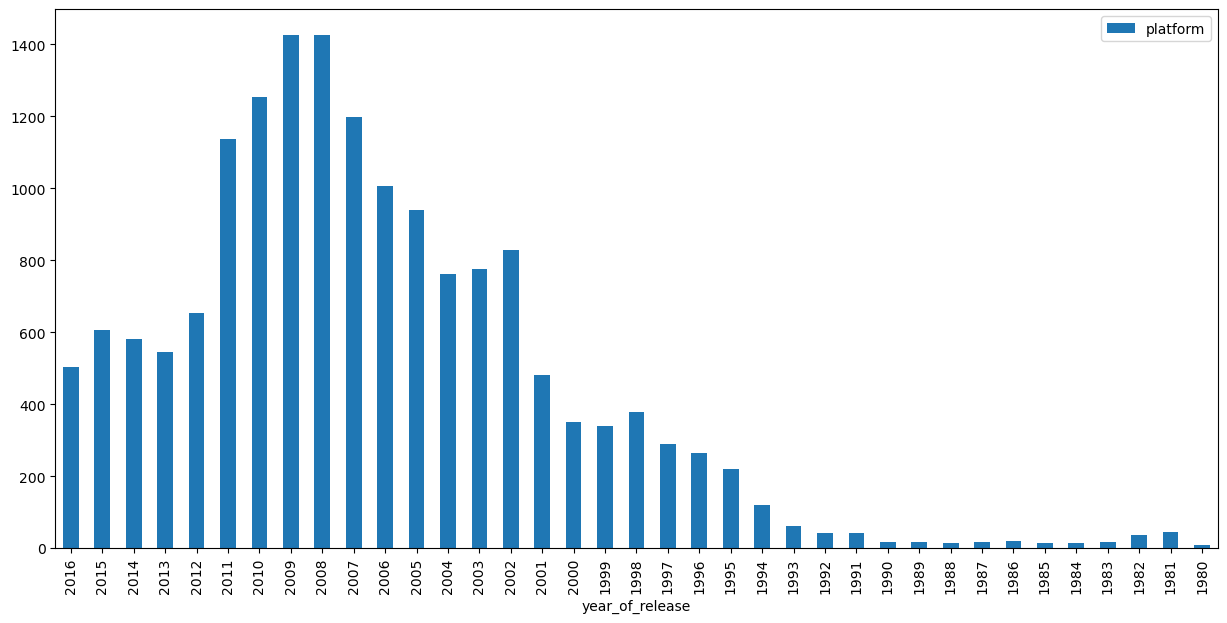

In [16]:
data.pivot_table(index = 'year_of_release', values = 'platform', aggfunc = 'count').sort_values(by = 'year_of_release', ascending = False).plot(kind='bar', figsize=(15,7))

[К оглавлению](#Оглавление)

#### 2.1. Вывод по годам<a name="Вывод_годам"></a>
Самый важный период это с 2005 по 2011, тогда было выпущено больше всего игр.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [17]:
popular = data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
popular

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


<AxesSubplot:xlabel='platform'>

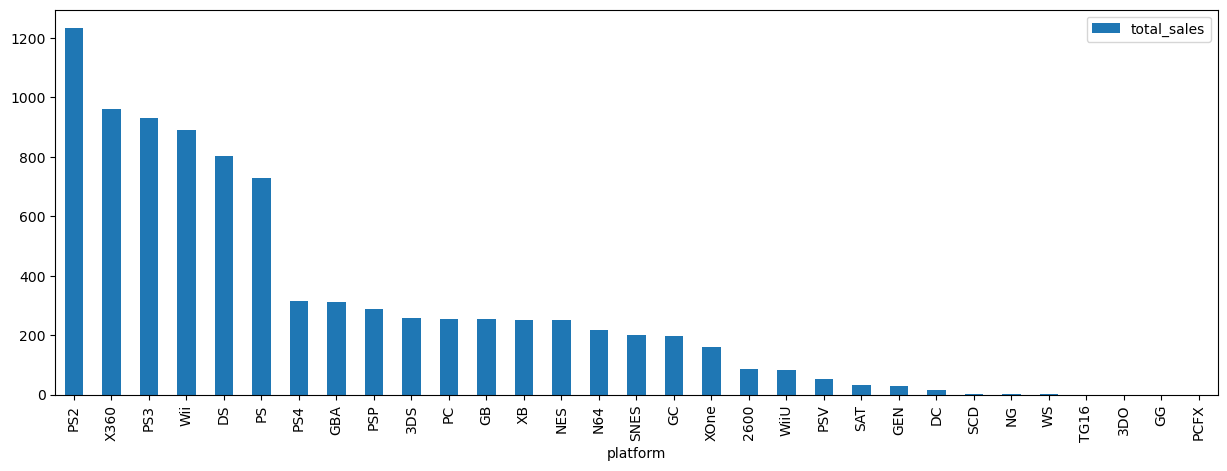

In [18]:
popular.plot(kind='bar', figsize=(15,5))

C:\Users\user\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


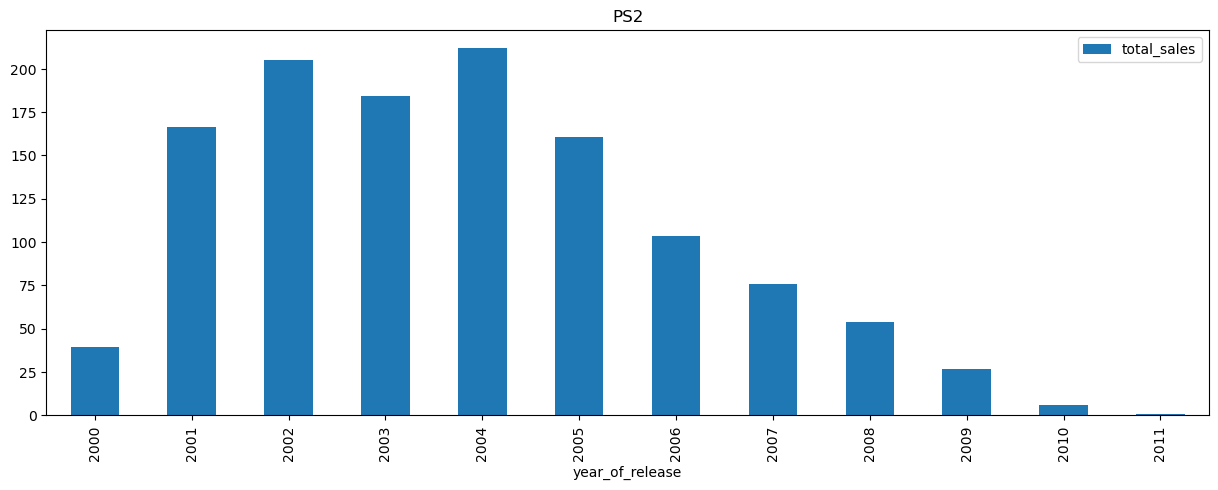

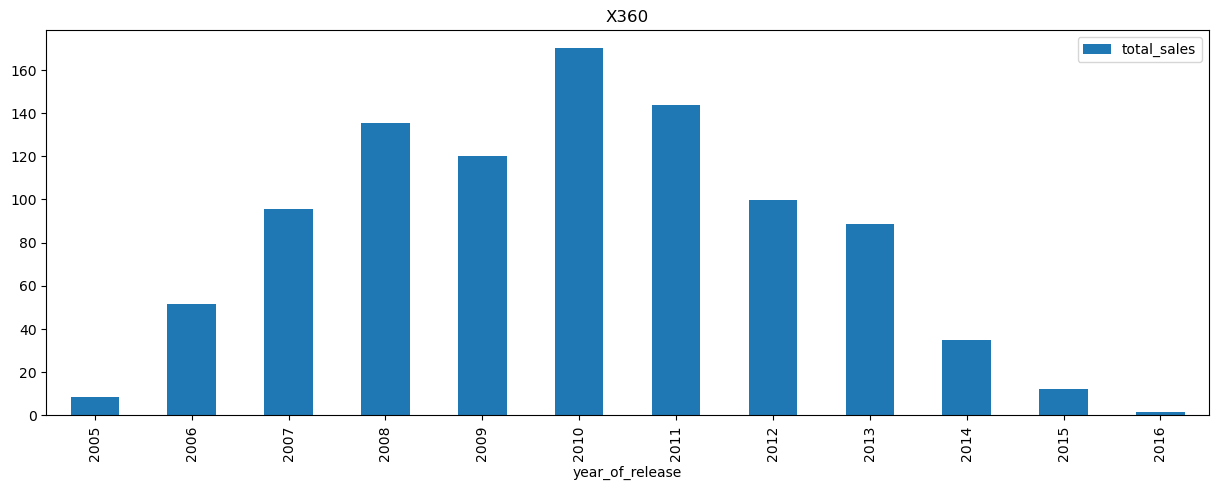

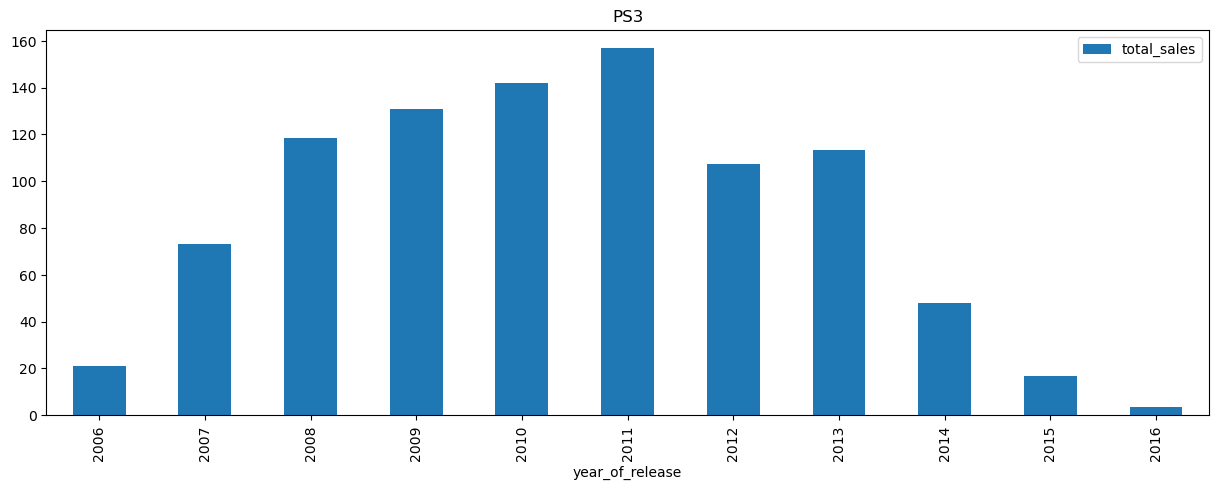

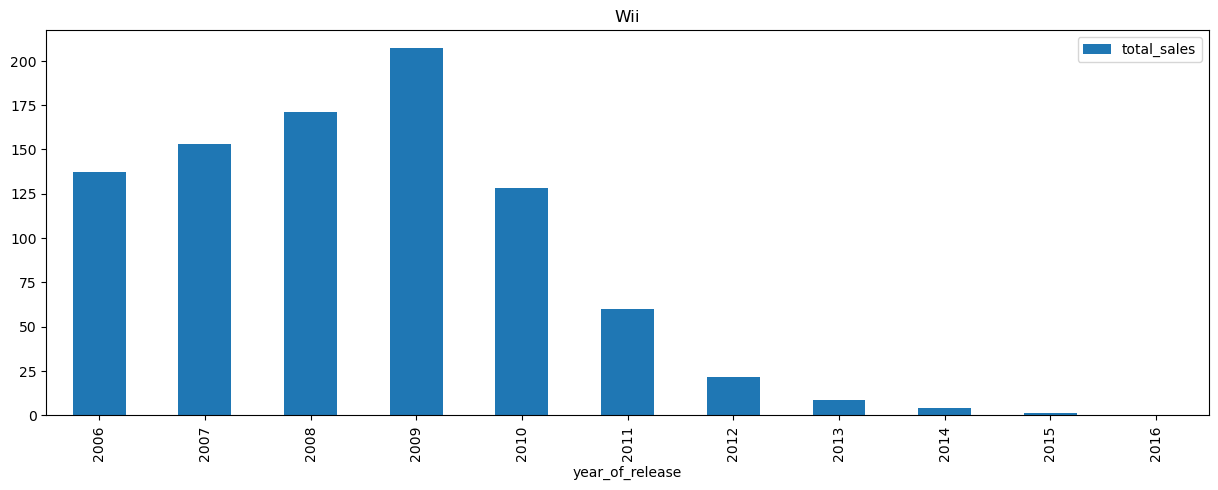

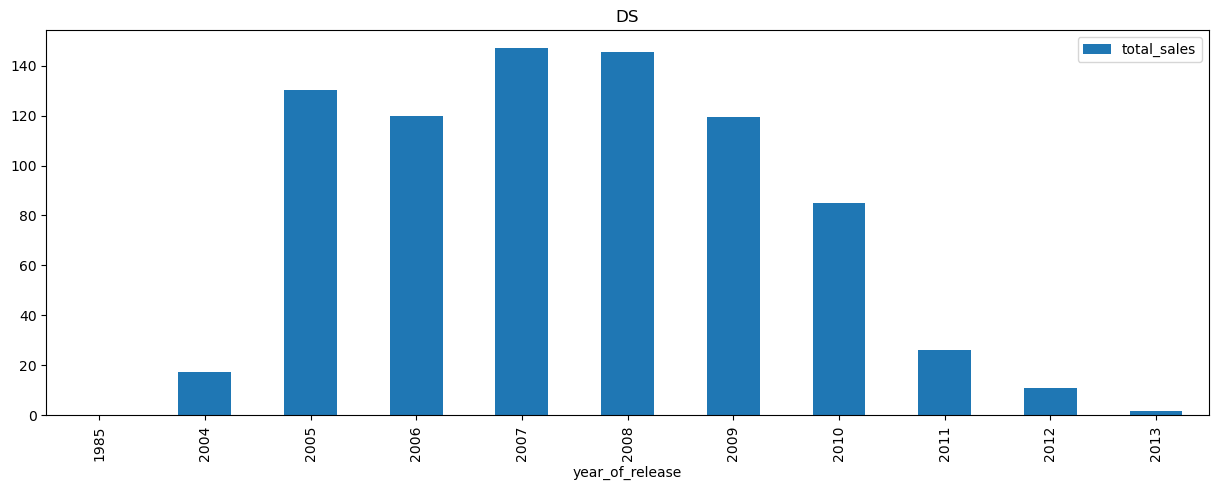

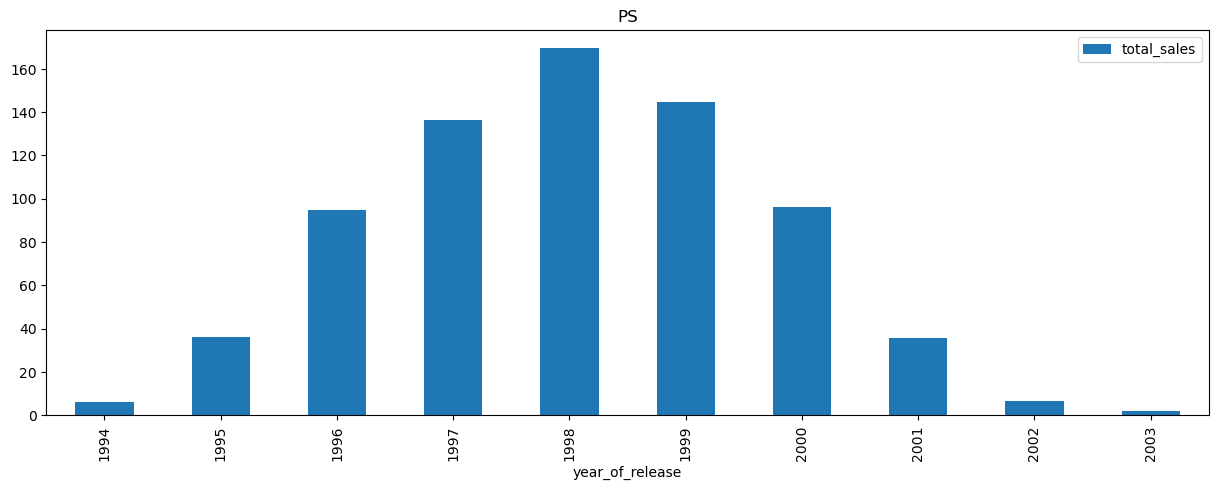

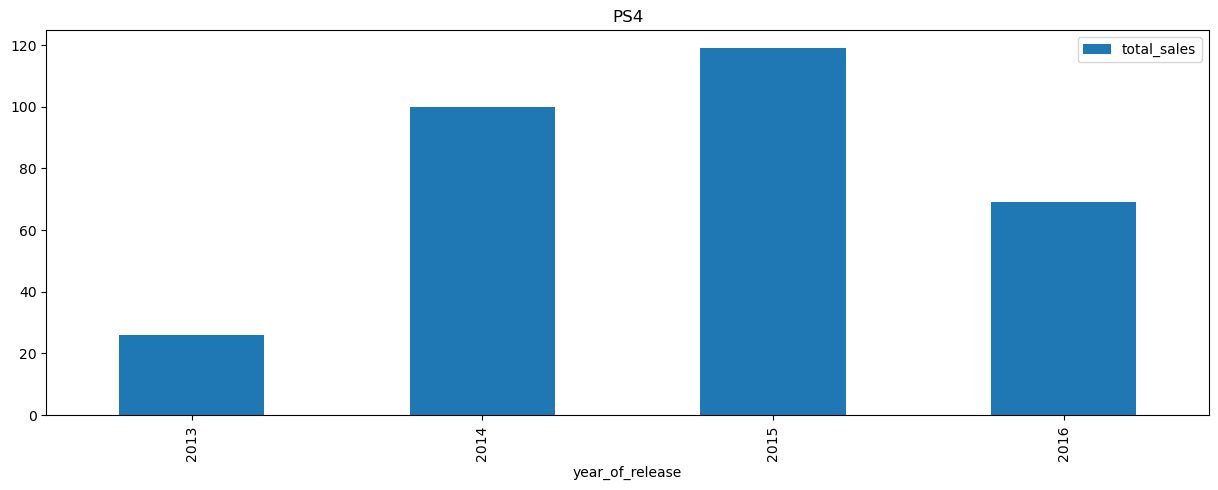

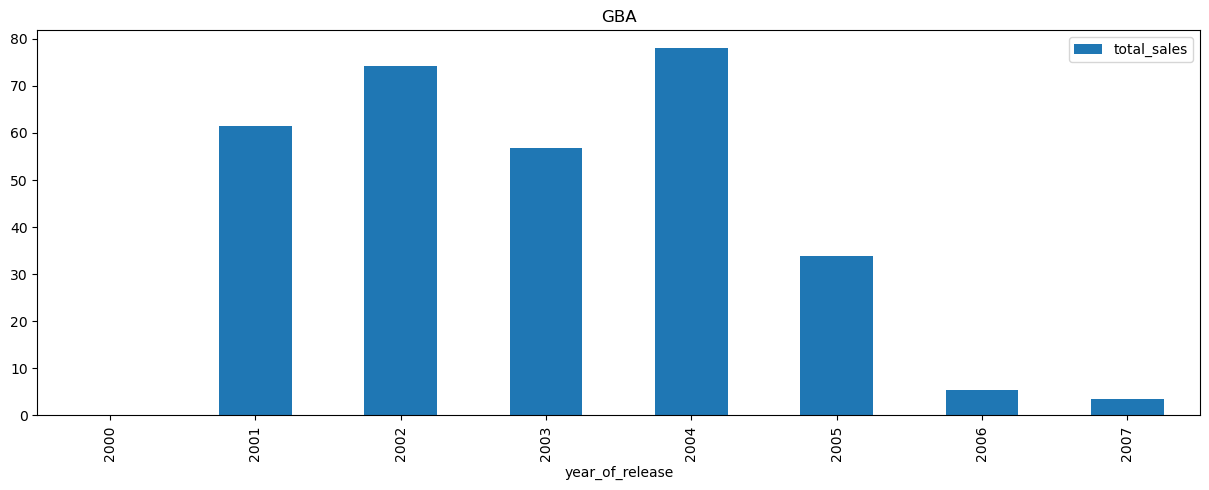

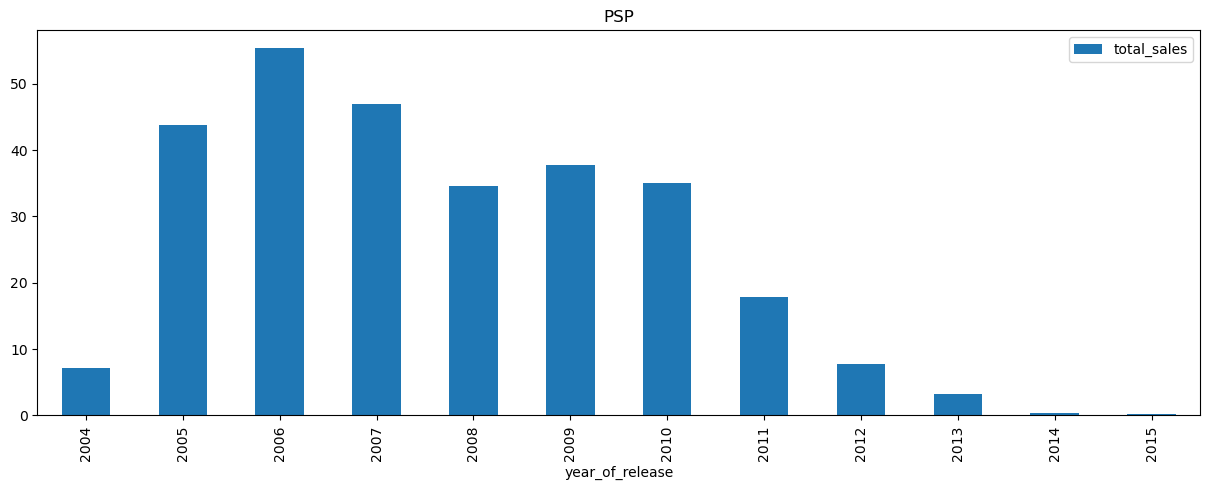

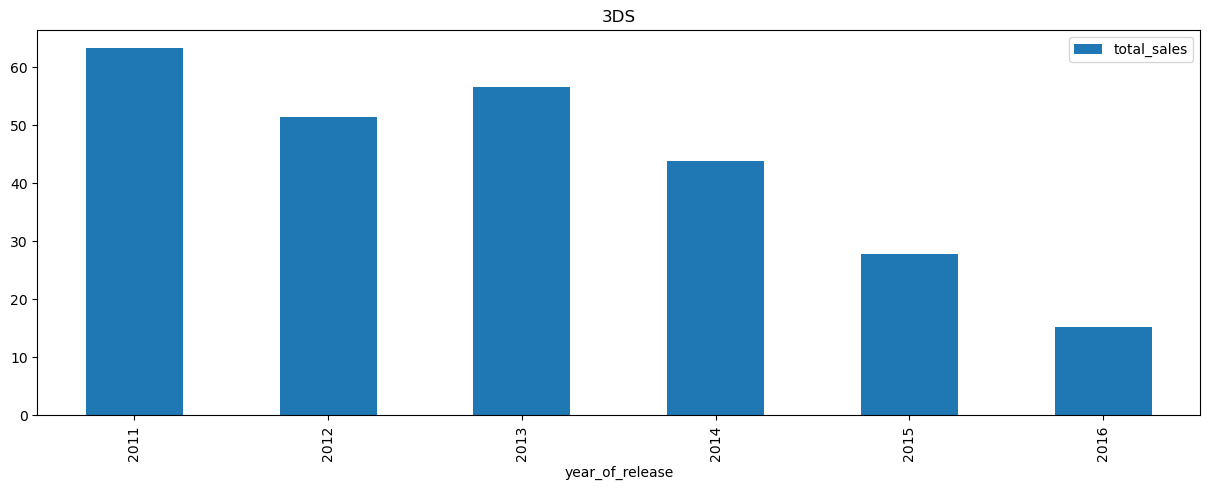

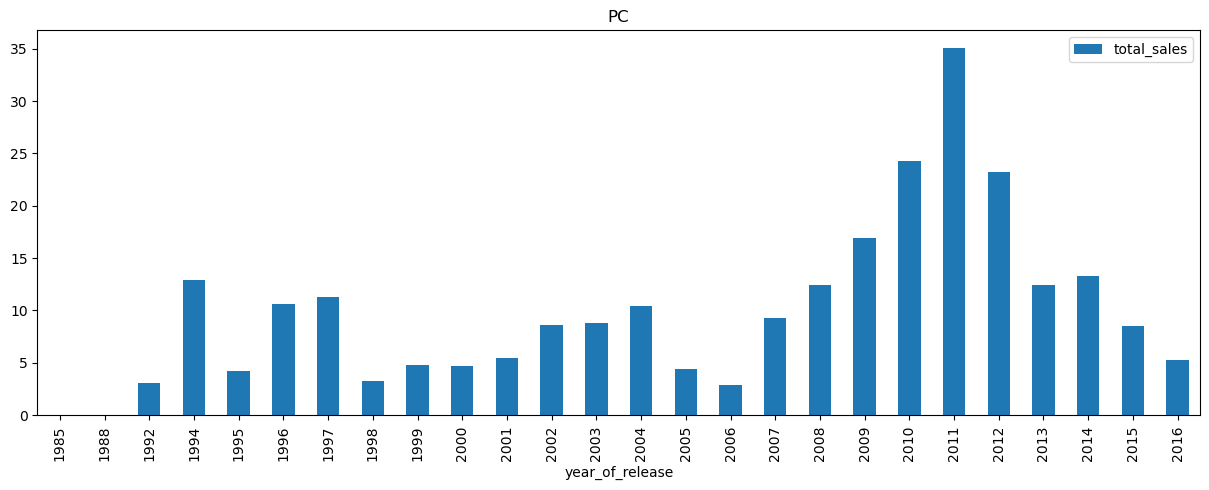

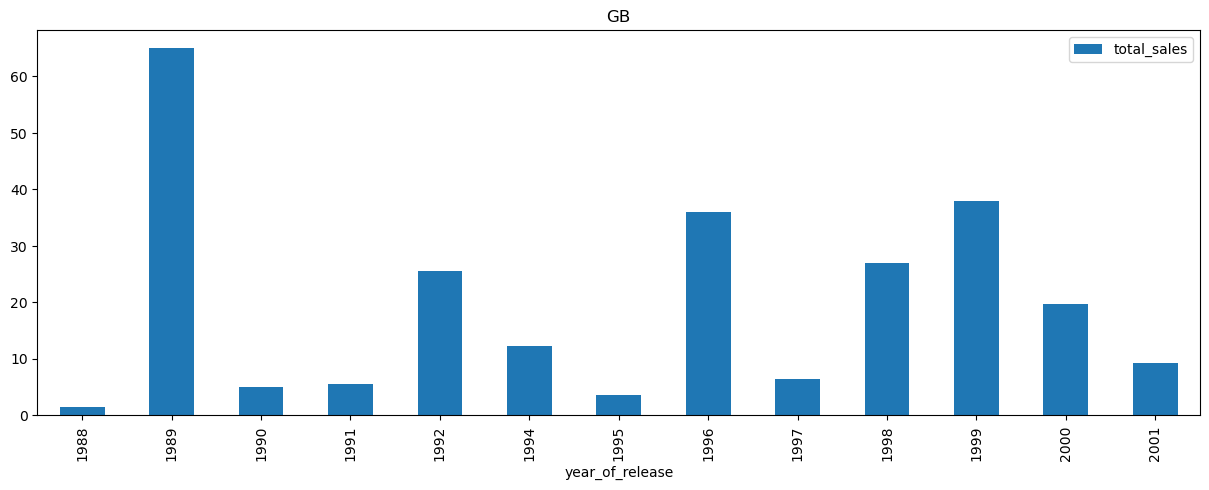

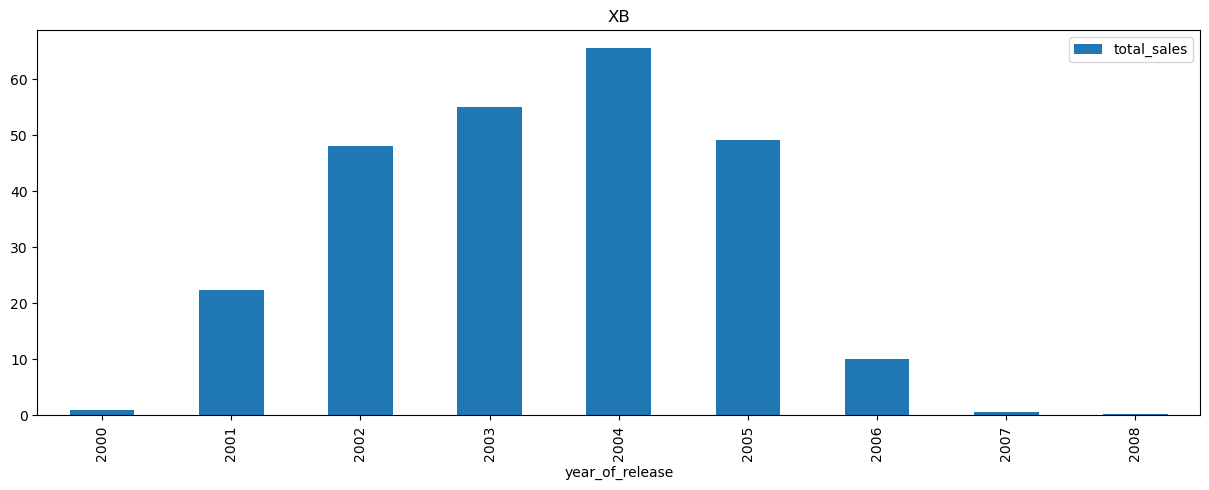

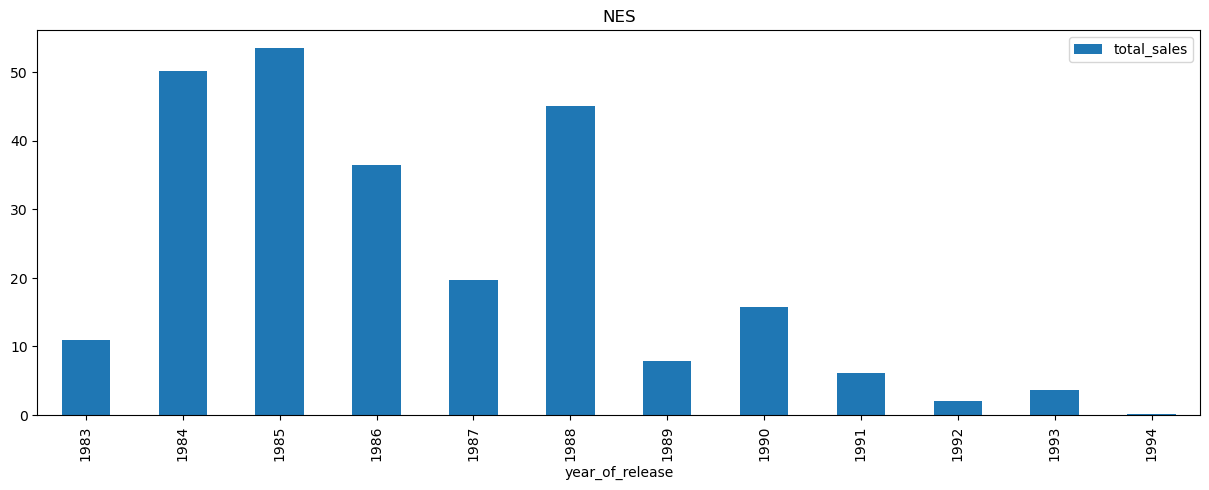

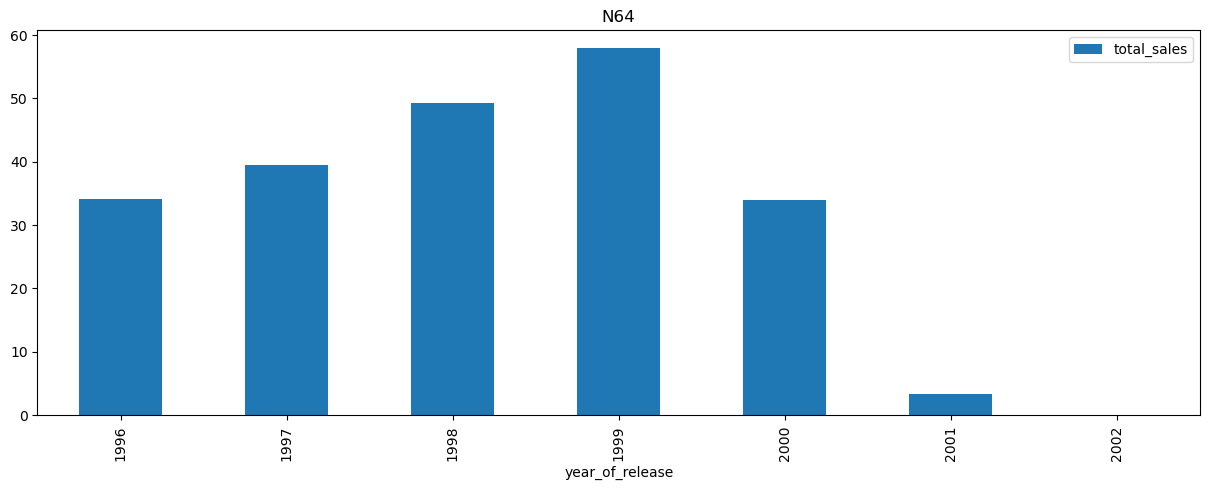

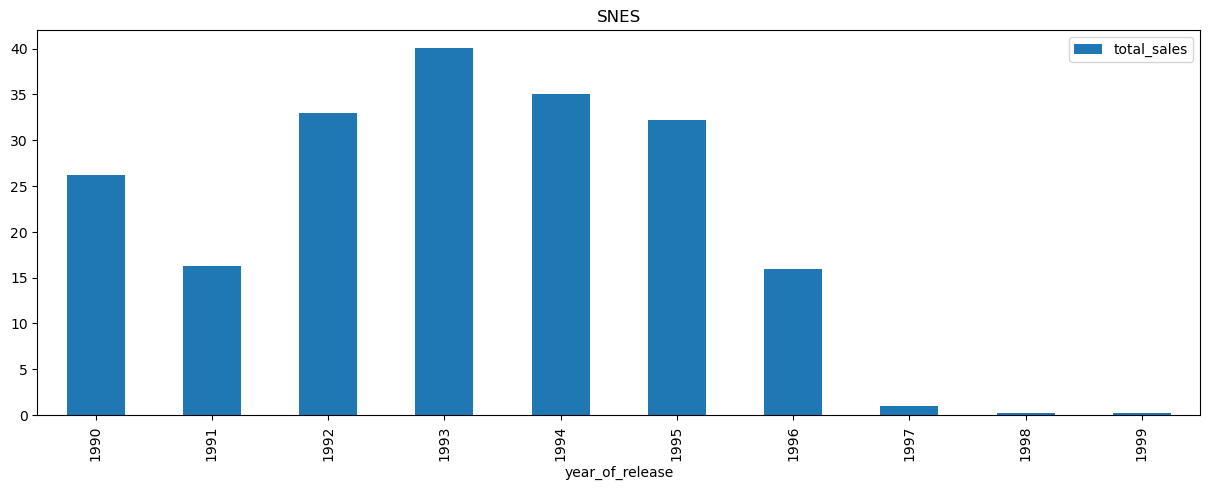

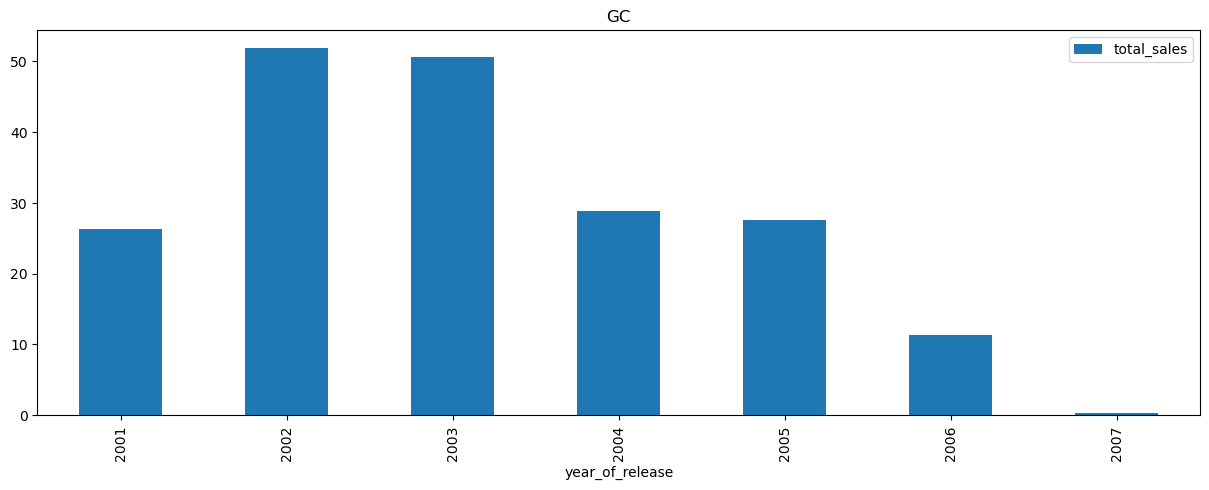

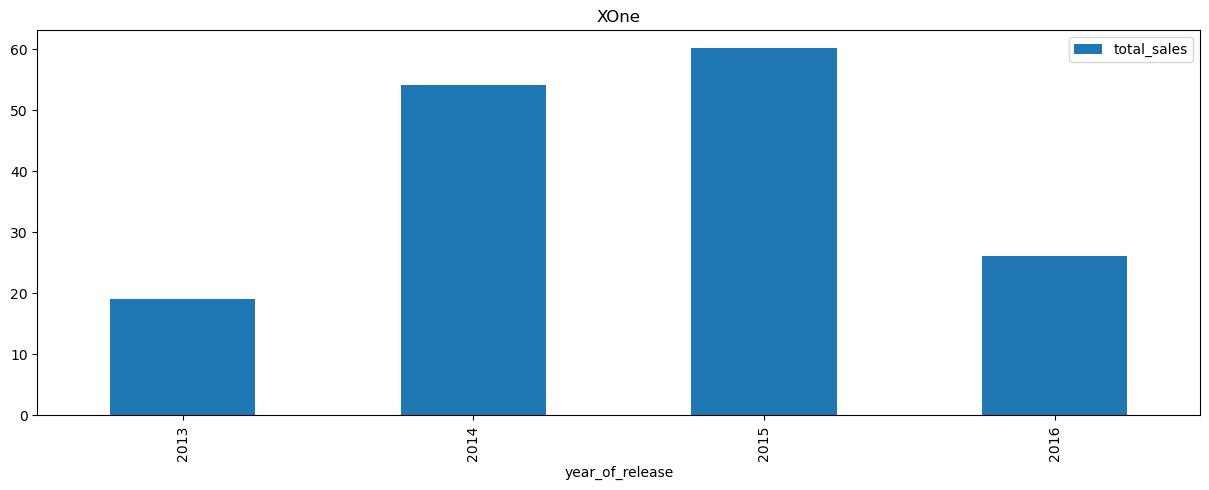

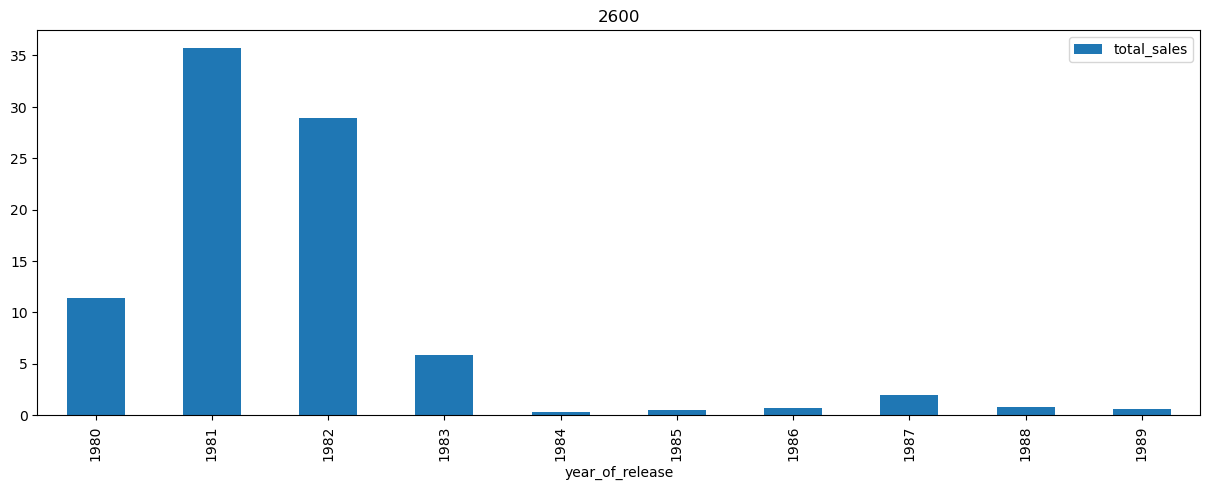

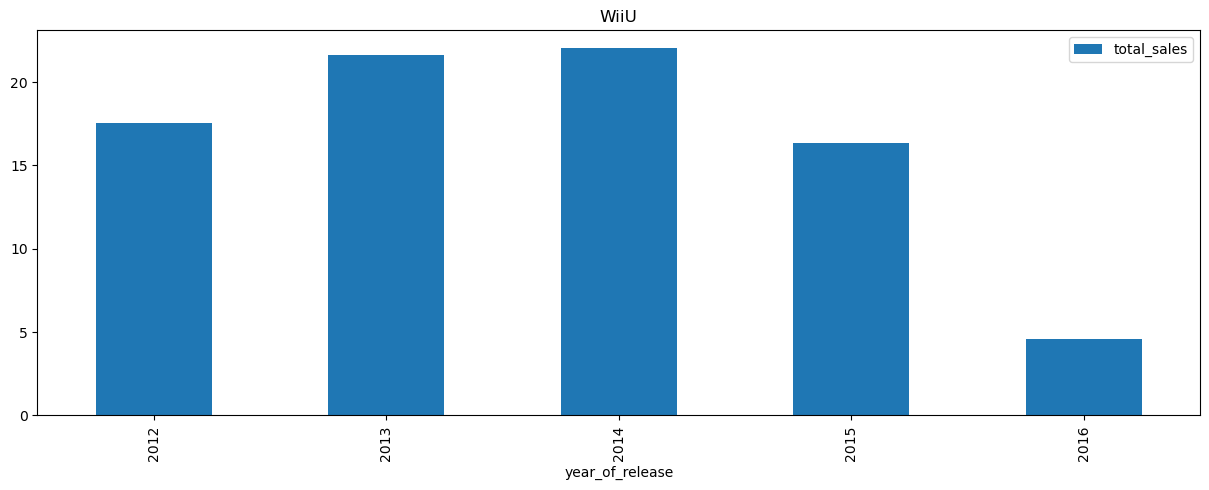

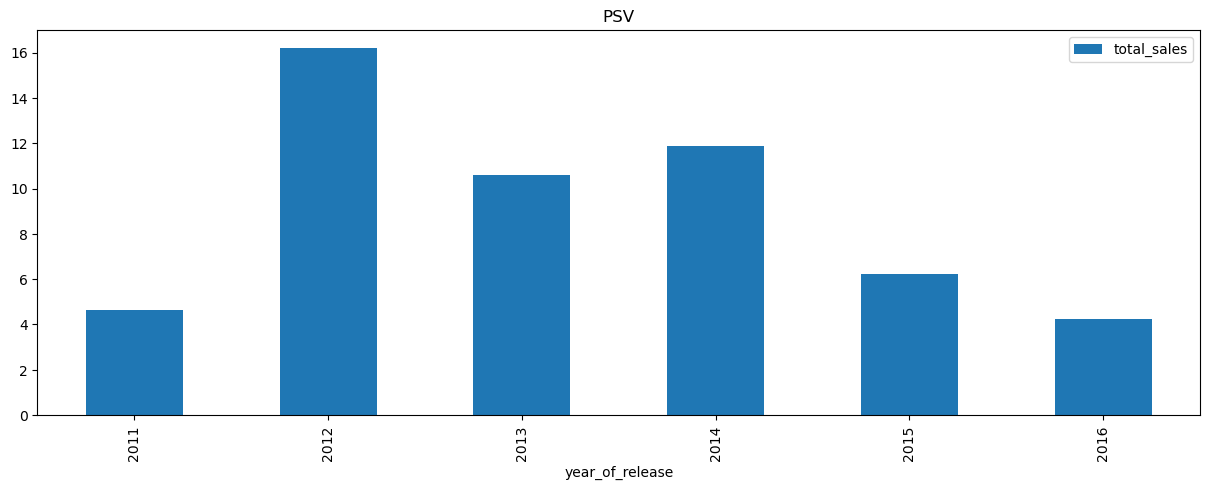

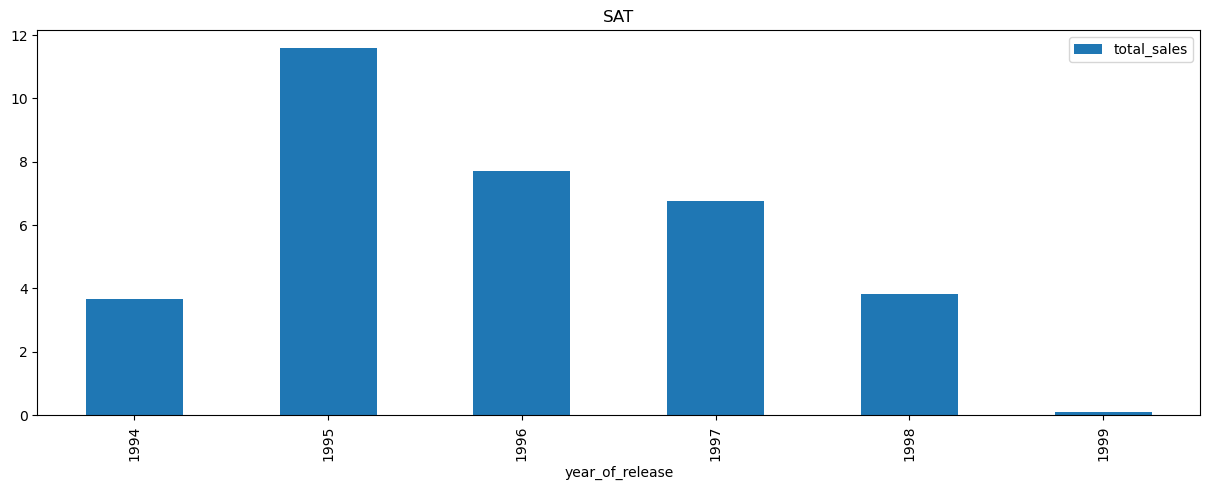

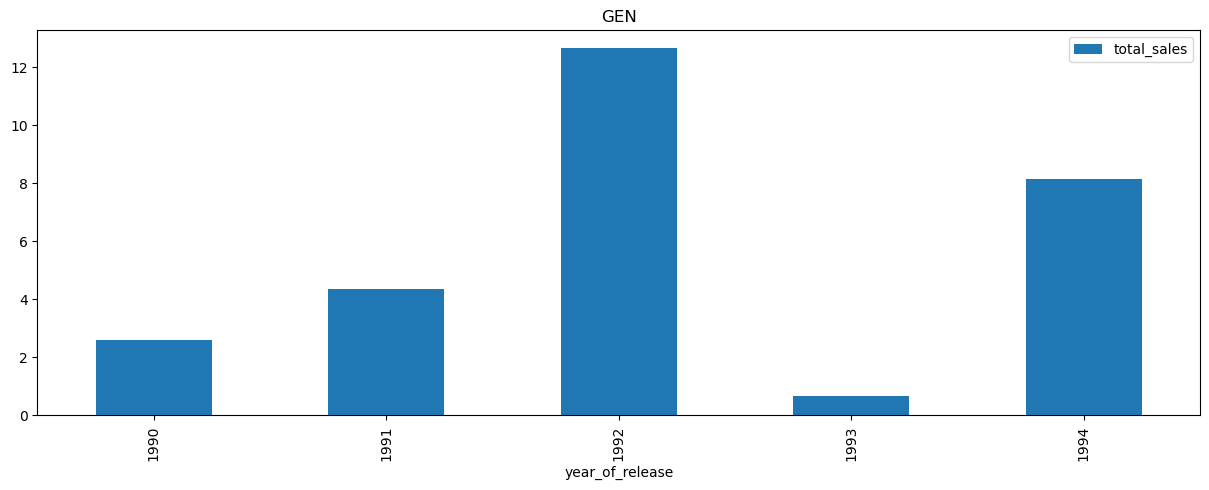

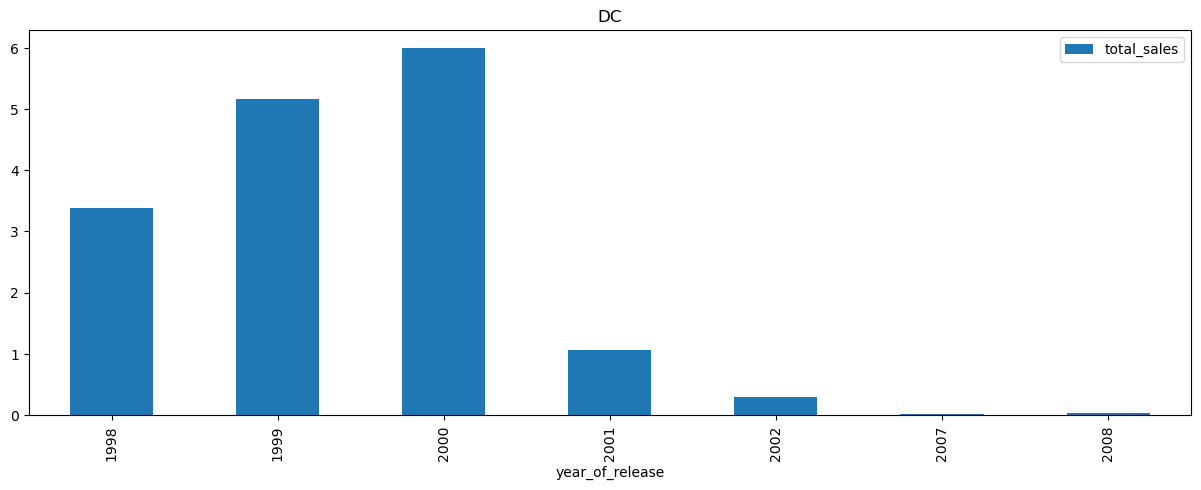

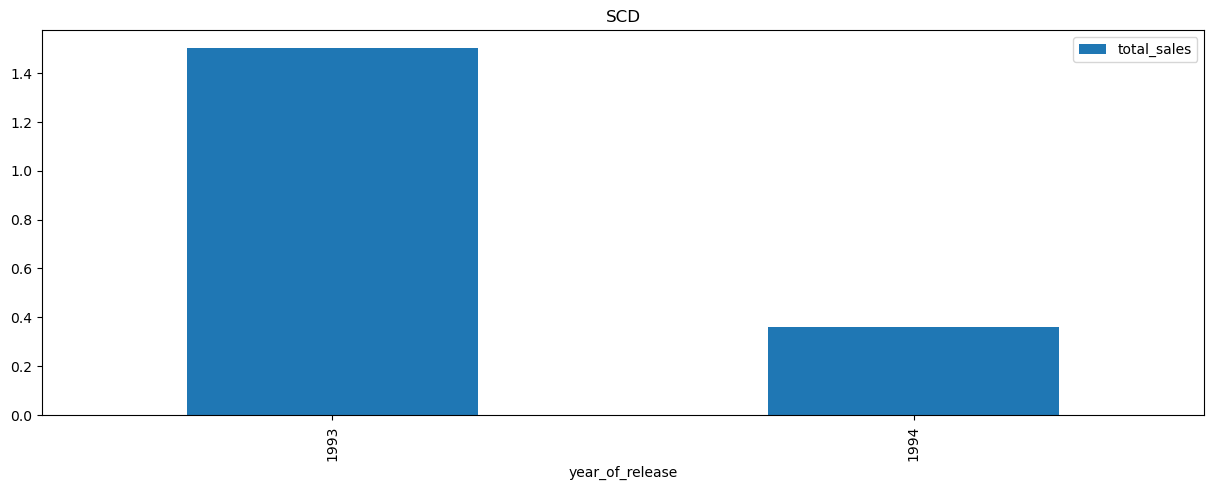

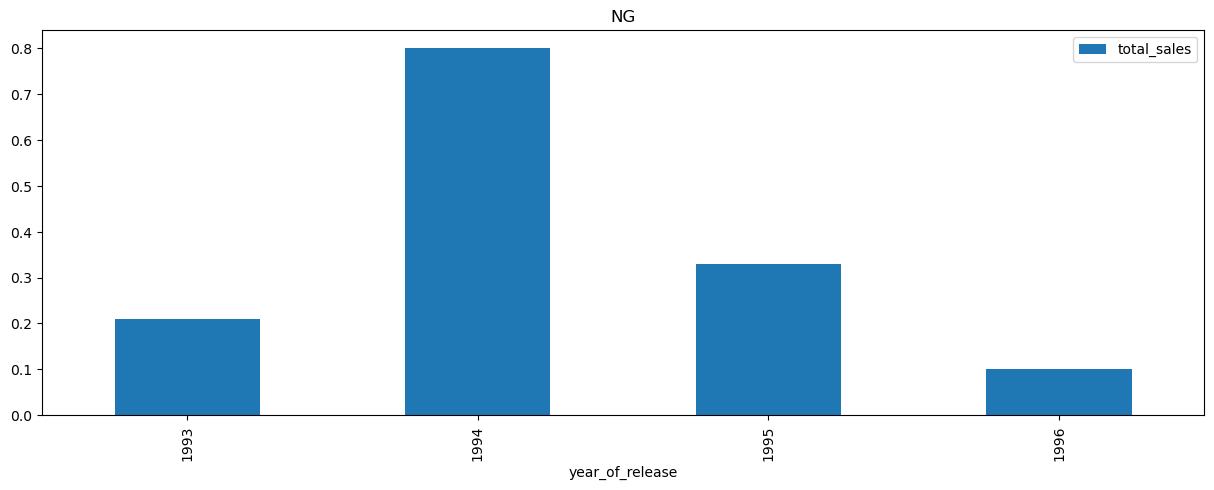

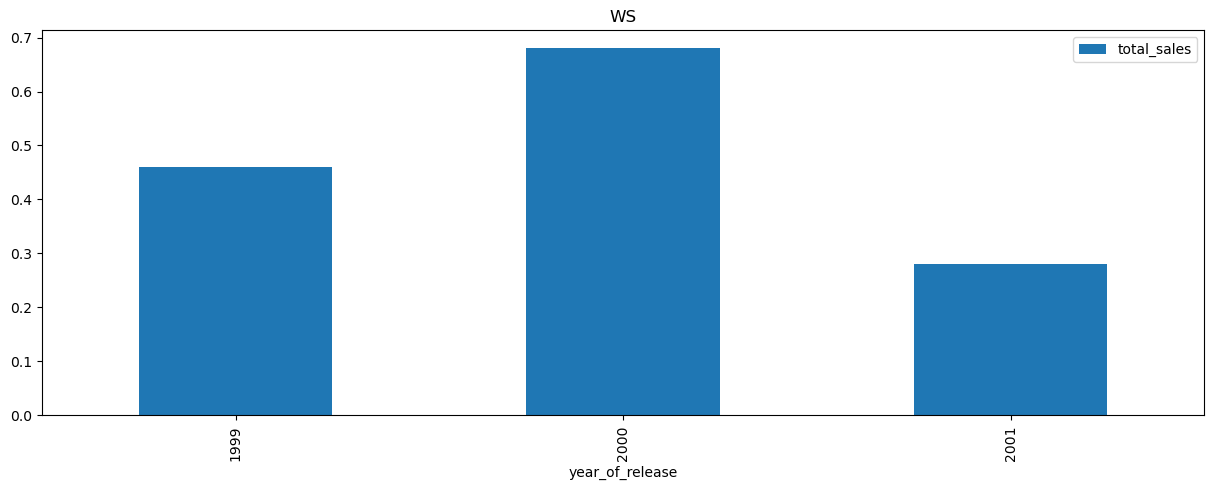

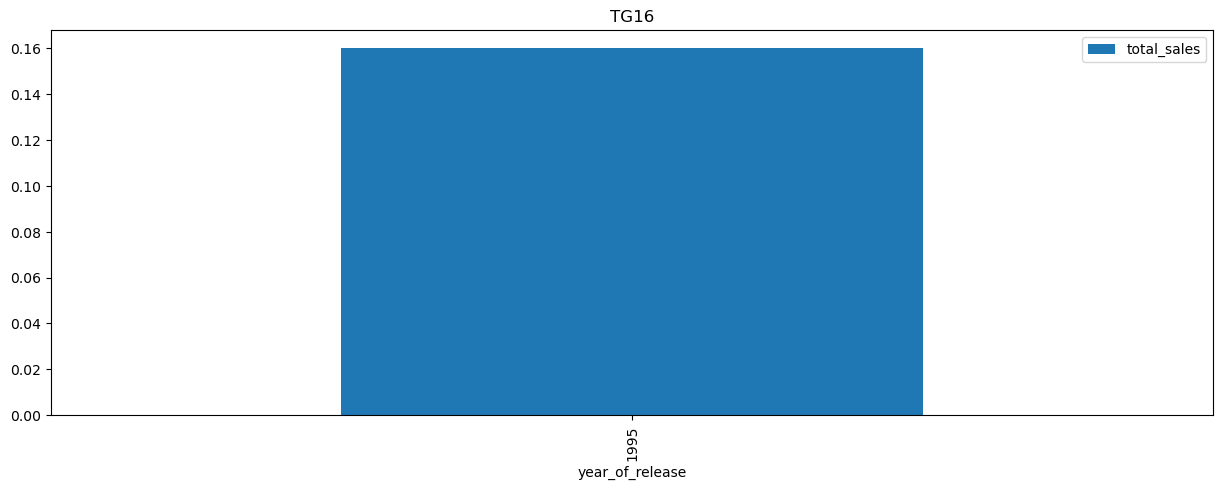

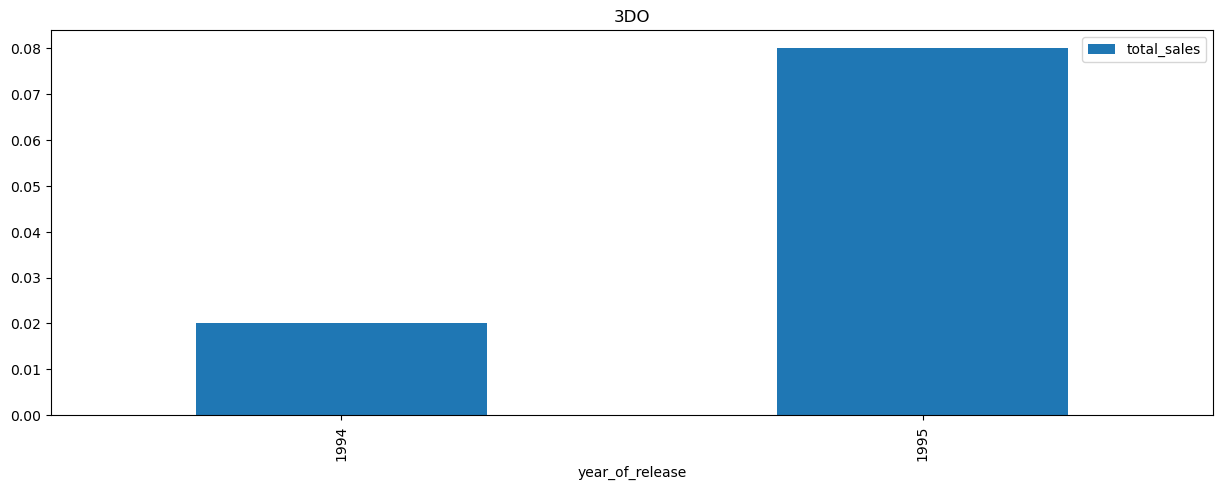

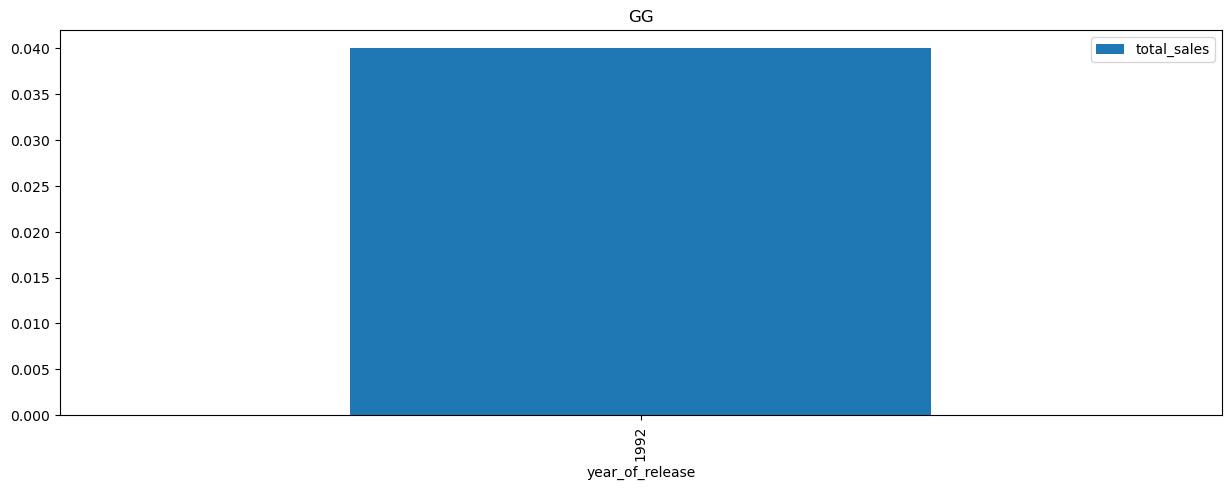

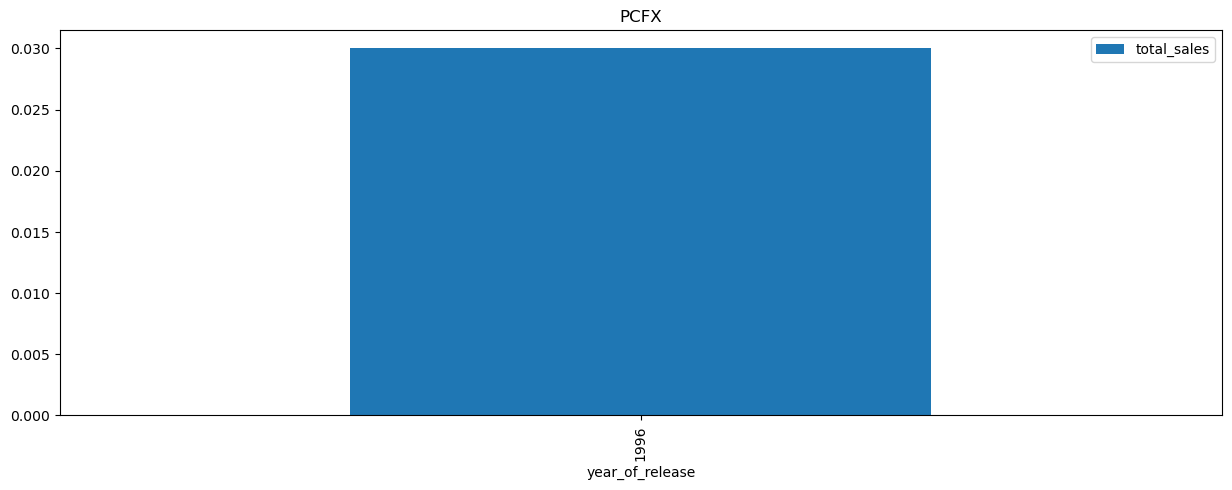

In [19]:
top10_platforms = popular.reset_index()
top_platforms_list = top10_platforms['platform'].unique()
for platform in top_platforms_list:
    data[data['platform'] == platform].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', figsize=(15,5))
    plt.title(platform);

[К оглавлению](#Оглавление)

#### 2.2. Вывод по времени жизни<a name="Вывод_времени"></a>
В среднем платформа "живет" 8-10 лет. Топовые платформы имеют гораздно меньше продаж к 2016 году. Большая часть платформ уже заканчивает свой активный период продаж.

Будем рассматривать период после пика в 2009 году, начиная с падения в 2010. 

In [20]:
actual_period = data[data['year_of_release'] >= 2010]
actual_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_10,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,63.0,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,82.0,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,81.0,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,Unknown,NaN,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,34.0,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,NaN,0.01


In [21]:
actual_period = data[data['year_of_release'] >= 2013]
actual_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_10,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,82.0,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,81.0,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknown,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,83.0,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,NaN,0.01


Вот список платформ которые все еще нормально продаются в 2016 году: PS4, PC, 3DS, XOne, wiiu.  

На всех платформах продажи падают.

Сохраним в переменной top_5_platform только все еще "живие" платформы и избавимся от выбросов

In [22]:
top_5_platform = actual_period[actual_period['platform'].isin(['PS4','XOne','PC','WiiU','3DS', 'PSV'])]

In [23]:
top_5_platform['total_sales'].describe()

count    1604.000000
mean        0.469925
std         1.150981
min         0.010000
25%         0.030000
50%         0.100000
75%         0.360000
max        14.630000
Name: total_sales, dtype: float64

Посмотрим на количество выпущенных каждой платформой игр, а также на средние глобальные продажи по платформам.

In [24]:
top_5_platform.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.04,0.09,0.280,14.60
PC,189.0,0.208624,0.352304,0.01,0.03,0.08,0.230,3.05
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.730,14.63
PSV,358.0,0.092151,0.153816,0.01,0.02,0.04,0.110,1.96
WiiU,115.0,0.562000,1.038778,0.01,0.06,0.20,0.595,7.09
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.685,7.39


Отрисуем ящики с усами 

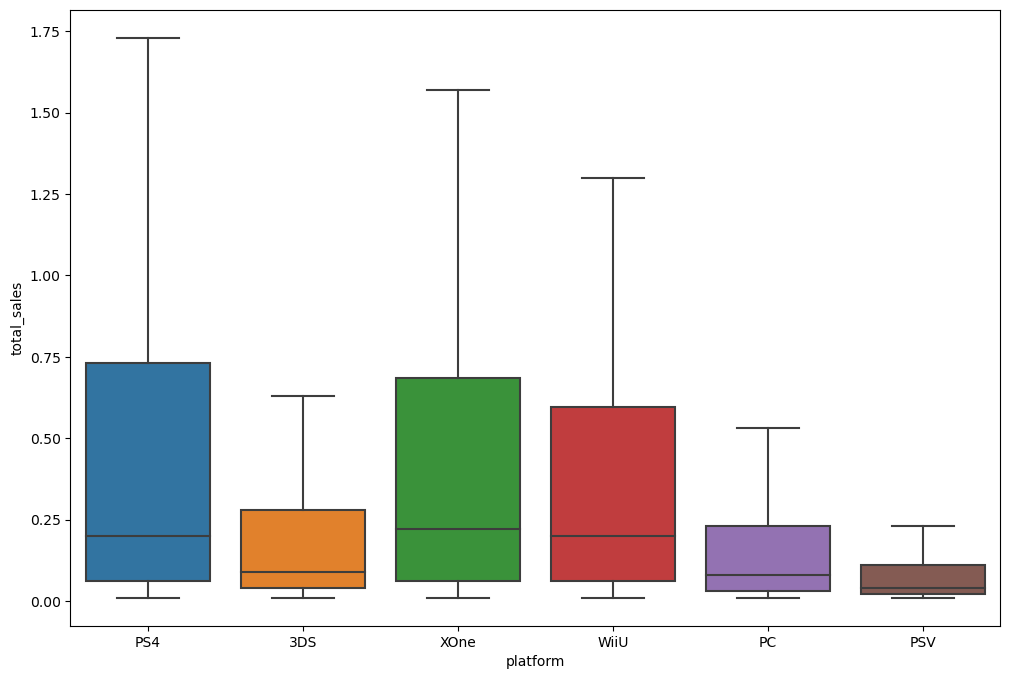

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(data=top_5_platform, x='platform', y='total_sales', showfliers=False);

[К оглавлению](#Оглавление)

#### 2.3. Вывод по продажам<a name="Вывод_продажам"></a>
Исходя из графиков видно, что медиана протекает у всех по разному. Больше всех продаж у PS4, затем XOne, после WiiU, 3DS, PC и PSV на последнем месте. Положение XOne и PS4 можно объяснить тем, что данные приставки позднее остальных вышли на рынки. ПК уступают приставкам на данном промежутке времени.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

In [26]:
XOne = actual_period.query('platform == "XOne"')
XOne_cor = XOne[['critic_score','user_score_10', 'total_sales']]
XOne_cor.corr()

,critic_score,user_score_10,total_sales
critic_score,1.000000,0.472462,0.416998
user_score_10,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000


Построим диаграмму рассеяния

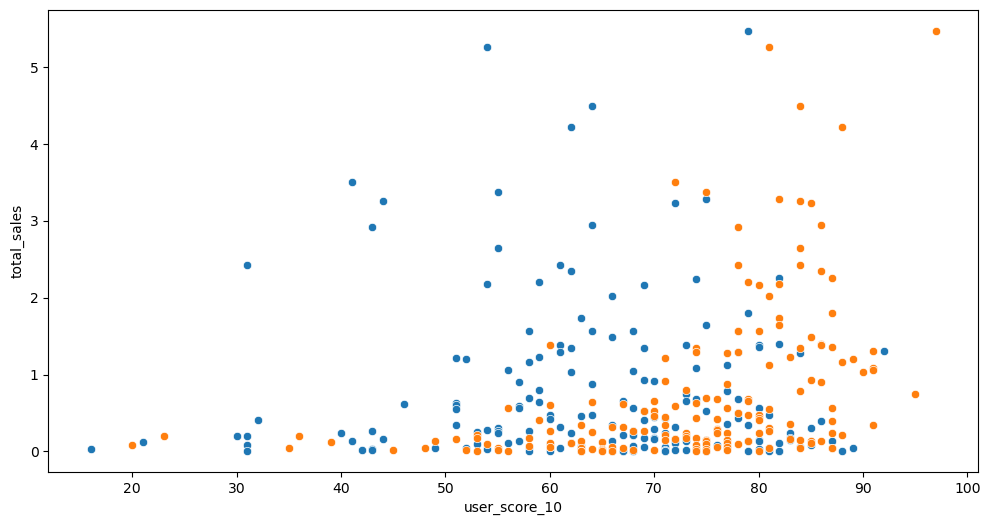

In [27]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score_10', y='total_sales', data=XOne)
sns.scatterplot(x='critic_score', y='total_sales', data=XOne);

Соотнесите выводы с продажами игр на других платформах.

In [28]:
PC = actual_period.query('platform == "PC"')
PC_cor = PC[['critic_score','user_score_10', 'total_sales']]
PC_cor.corr()

,critic_score,user_score_10,total_sales
critic_score,1.000000,0.429562,0.196030
user_score_10,0.429562,1.000000,-0.093842
total_sales,0.196030,-0.093842,1.000000


Построим диаграмму рассеяния

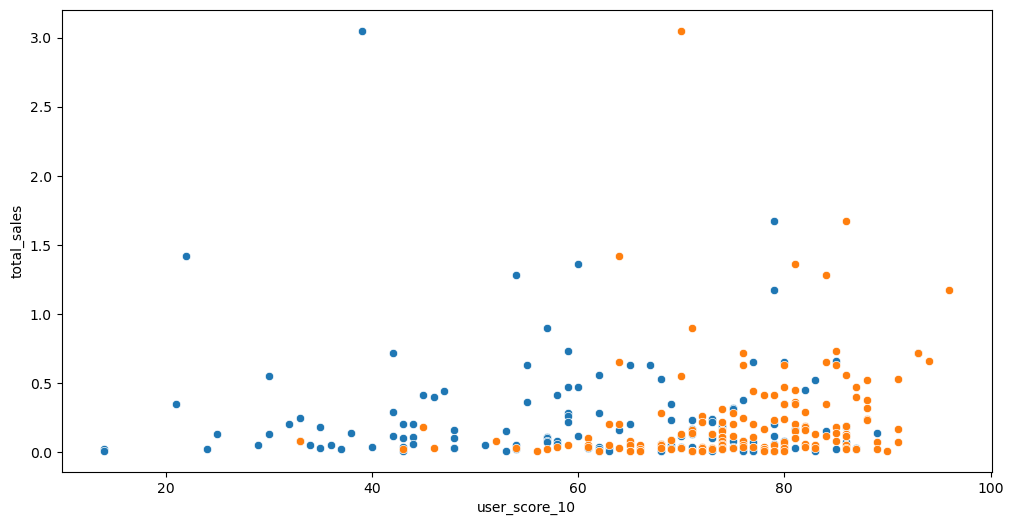

In [29]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score_10', y='total_sales', data=PC)
sns.scatterplot(x='critic_score', y='total_sales', data=PC);

In [30]:
PS4 = actual_period.query('platform == "PS4"')
PS4_cor = PS4[['critic_score','user_score_10', 'total_sales']]
PS4_cor.corr()

,critic_score,user_score_10,total_sales
critic_score,1.000000,0.557654,0.406568
user_score_10,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


Построим диаграмму рассеяния

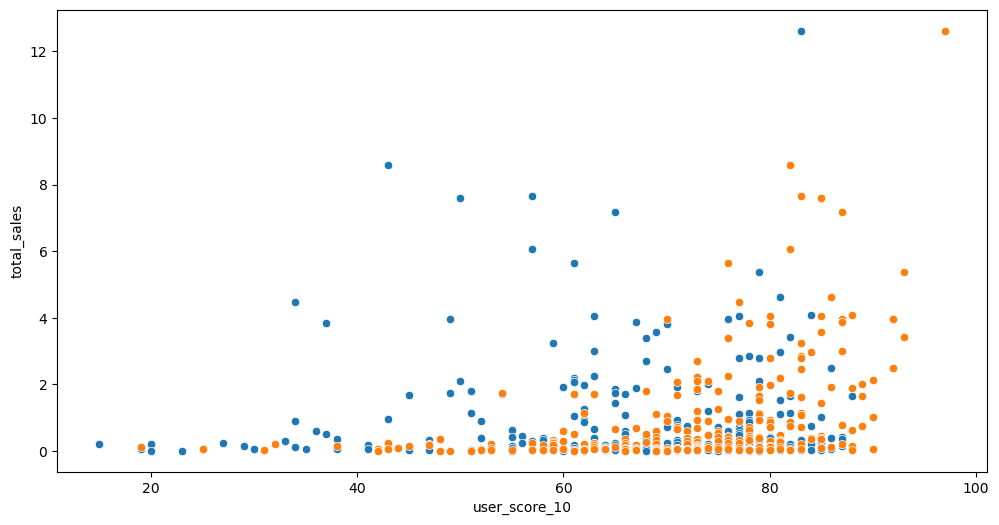

In [31]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score_10', y='total_sales', data=PS4)
sns.scatterplot(x='critic_score', y='total_sales', data=PS4);

In [32]:
WiiU = actual_period.query('platform == "WiiU"')
WiiU_cor = WiiU[['critic_score','user_score_10', 'total_sales']]
WiiU_cor.corr()

,critic_score,user_score_10,total_sales
critic_score,1.000000,0.721313,0.376415
user_score_10,0.721313,1.000000,0.419330
total_sales,0.376415,0.419330,1.000000


Построим диаграмму рассеяния

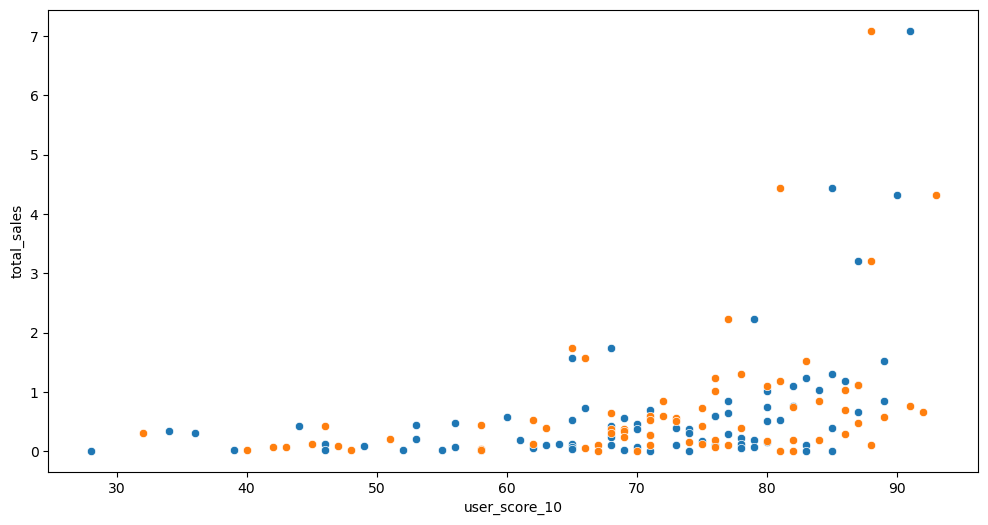

In [33]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score_10', y='total_sales', data=WiiU)
sns.scatterplot(x='critic_score', y='total_sales', data=WiiU);

[К оглавлению](#Оглавление)

#### 2.4. Вывод по оценкам <a name="Вывод_оценкам"></a>
У PS4 наблюдается пусть и не сильная, но всё же, связь между оценками критиков и продажами. А связь между оценками пользователей и продажами слабая у всех платформ, либо её совсем нет. Только у WiiU корреляция между отзывами пользователей и продажами - уверенная и даже выше, чем корреляция между отзывами критиков и игровой платформой.

Посмотрим на общее распределение игр по жанрам.

In [34]:
genre = top_5_platform.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
genre

,genre,total_sales
0,Action,199.18
1,Shooter,165.71
2,Role-Playing,123.94
3,Sports,90.67
4,Misc,34.66
5,Platform,34.22
6,Racing,30.36
7,Fighting,26.69
8,Simulation,19.81
9,Adventure,16.48


Построим диаграмму для наглядности

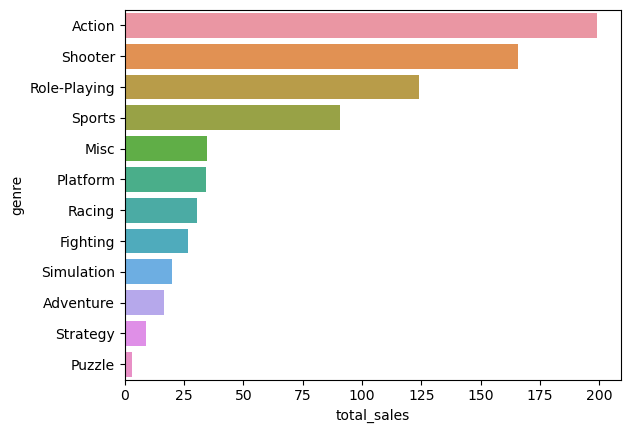

In [35]:
sns.barplot(data=genre, x='total_sales', y='genre');

In [36]:
genre_2 = actual_period.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
genre_2

,genre,total_sales
0,Action,321.87
1,Shooter,232.98
2,Sports,150.65
3,Role-Playing,145.89
4,Misc,62.82
5,Platform,42.63
6,Racing,39.89
7,Fighting,35.31
8,Adventure,23.64
9,Simulation,21.76


Построим диаграмму для наглядности

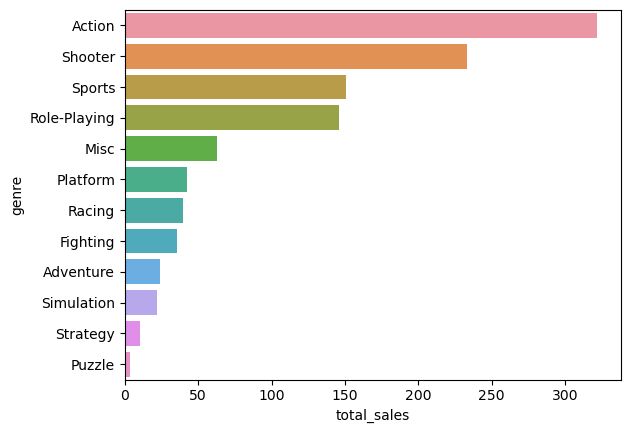

In [37]:
sns.barplot(data=genre_2, x='total_sales', y='genre');

[К оглавлению](#Оглавление)

#### 2.5. Вывод по жанрам: <a name="Вывод_жанрам"></a>
Самый популярный жанр 'Action'. Самый не популярный 'Puzzle'

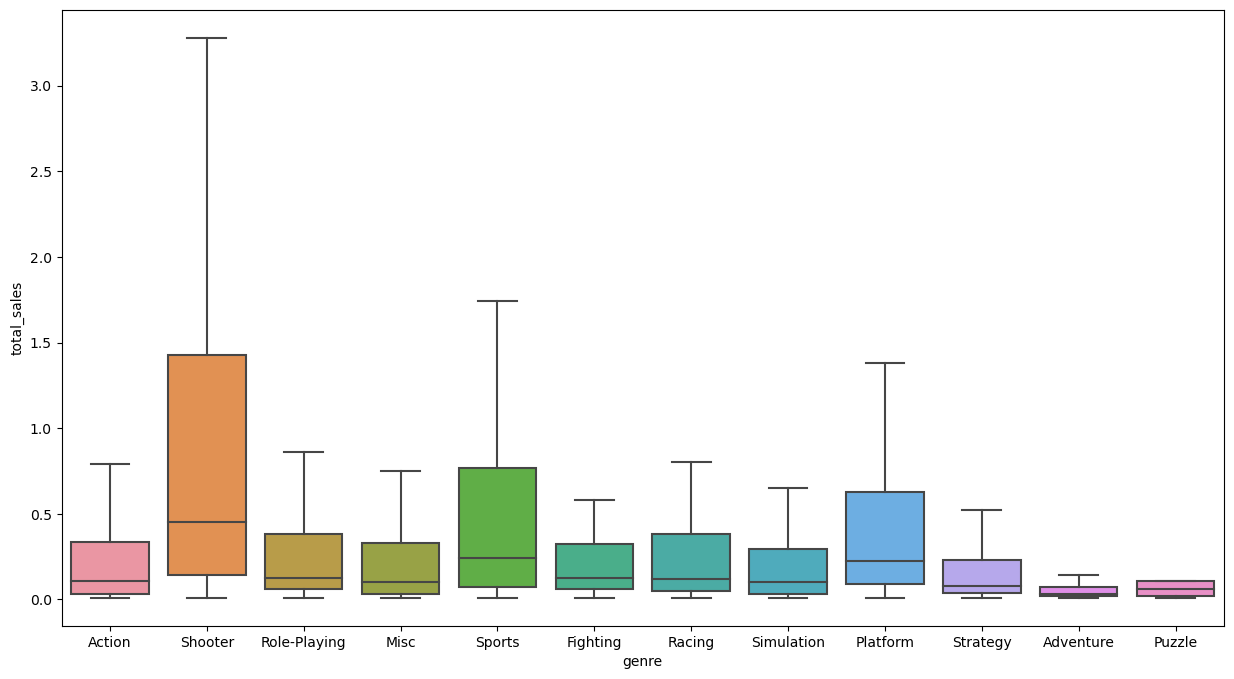

In [38]:
plt.figure(figsize=(15,8))
sns.boxplot(data=actual_period, x='genre', y='total_sales', showfliers=False);

Если посмотреть на ящик с усами по жанрам, то видно что на первом месте по продажам шутеры. Бывший лидер "Action" на 6 месте.

### 2.6. Общий вывод по анализу данных<a name="Общий_анализу"></a>
С 2005 по 2011, тогда было выпущено больше всего игр.
Больше всех продаж у PS4, затем XOne, после WiiU, 3DS, PC и PSV на последнем месте Положение XOne и PS4 можно объяснить тем, что данные приставки позднее остальных вышли на рынки. ПК уступают приставкам на данном промежутке времени.
В среднем платформа "живет" 8-10 лет. Топовые платформы имеют гораздно меньше продаж к 2016 году. Большая часть платформ уже заканчивает свой активный период продаж.
У анализируемых нами платформ наблюдается взаимосвязь между продажами и оценками критиков. Пользовательские же оценки почти не играют значимой роли. Это значит, что для людей мнение критиков важнее мнения других пользователей.
Самый популярный жанр за последние 5 лет: 'Shooter'.

[К оглавлению](#Оглавление)

## 3. Составление портрета пользователя каждого региона<a name="Составление"></a>

Определите для пользователя каждого региона (NA, EU, JP):

### 3.1. Популярные платформы<a name="Популярные_платформы"></a>

#### 3.1.1. NA<a name="1"></a>

In [39]:
na_popular_platforms = actual_period.groupby('platform').na_sales.mean().sort_values(ascending=False)[:5]
na_popular_platforms

platform
X360    0.439032
XOne    0.377004
Wii     0.285217
PS4     0.277398
WiiU    0.254000
Name: na_sales, dtype: float64

#### 3.1.2. EU<a name="2"></a>

In [40]:
eu_popular_platforms = actual_period.groupby('platform').eu_sales.mean().sort_values(ascending=False)[:5]
eu_popular_platforms 

platform
PS4     0.359923
Wii     0.257826
X360    0.228602
XOne    0.208866
PS3     0.196551
Name: eu_sales, dtype: float64

#### 3.1.3. JP<a name="3"></a>

In [41]:
jp_popular_platforms = actual_period.groupby('platform').jp_sales.mean().sort_values(ascending=False)[:5]
jp_popular_platforms

platform
3DS     0.223795
WiiU    0.094609
PS3     0.067681
PSV     0.051927
PSP     0.049104
Name: jp_sales, dtype: float64

[К оглавлению](#Оглавление)

### 3.2. Вывод по популярным платформам<a name="Вывод_платформам"></a>
Азиатский рынок наиоблее обособлен от остальных.

Европейский и американский во многом схожи.

Судя по графику платформа Wii была нацелена именно на американский рынок, учитывая то, что на других рынках она оказалась в аутсайдерах.

Самой популярной линейкой-платформ в США является - XBox

Самой популярной линейкой-платформ в Европе является - Playstation

Самой популярной линейкой-платформ в Японии является - DS(Nintendo)

### 3.3. Популярные жанры<a name="Популярные_жанры"></a>

#### 3.3.1. NA<a name="11"></a>

In [42]:
na_popular_genres = actual_period.groupby('genre').na_sales.mean().sort_values(ascending=False)[:5]
na_popular_genres

genre
Shooter     0.586845
Sports      0.305000
Platform    0.245135
Fighting    0.194375
Misc        0.177355
Name: na_sales, dtype: float64

#### 3.3.2. EU<a name="22"></a>

In [43]:
eu_popular_genres = actual_period.groupby('genre').eu_sales.mean().sort_values(ascending=False)[:5]
eu_popular_genres

genre
Shooter       0.469840
Sports        0.282804
Racing        0.237529
Platform      0.210541
Simulation    0.176129
Name: eu_sales, dtype: float64

#### 3.3.3. JP<a name="33"></a>

In [44]:
jp_popular_genres = actual_period.groupby('genre').jp_sales.mean().sort_values(ascending=False)[:5]
jp_popular_genres

genre
Role-Playing    0.174795
Fighting        0.095625
Simulation      0.072903
Puzzle          0.069412
Platform        0.064730
Name: jp_sales, dtype: float64

[К оглавлению](#Оглавление)

### 3.4. Вывод по популярным жанрам<a name="Вывод_жанрам"></a>
Американский и европейский рынки опять-таки довольно похожи

На азиатском рынке с отрывом лидирует жанр ролевых игр, после которого идет популярный везде жанр платформеров

### 3.5. Рейтинг ESRB<a name="Рейтинг_ESRB"></a>

#### 3.5.1. NA<a name="111"></a>

In [45]:
na_popular_ratings = actual_period.groupby('rating').sum().na_sales
na_popular_ratings 

rating
E           79.05
E10+        54.24
M          165.21
T           49.79
Unknown     89.42
Name: na_sales, dtype: float64

#### 3.5.2. EU<a name="222"></a>

In [46]:
eu_popular_ratings =  actual_period.groupby('rating').sum().eu_sales
eu_popular_ratings

rating
E           83.36
E10+        42.69
M          145.32
T           41.95
Unknown     78.91
Name: eu_sales, dtype: float64

#### 3.5.3. JP<a name="333"></a>

In [47]:
jp_popular_ratings = actual_period.groupby('rating').sum().jp_sales
jp_popular_ratings

rating
E          15.14
E10+        5.89
M          14.11
T          20.59
Unknown    85.05
Name: jp_sales, dtype: float64

### 3.6. Вывод по рейтингу <a name="Вывод_рейтингу"></a>
На всёх 3 рынках доминируют игры с рейтингом E.

Больше всего игр без рейтинга покупают азиаты. У них это доминирующая позиция. Вероятнее всего потому что ESRB рейтинг характерен для европейских и американских игр и не все игры из Японии его получают.

[К оглавлению](#Оглавление)

## 4. Проверка гипотез<a name="Проверка_гипотез"></a>

### 4.1. Проверка первой гипотезы: <a name="Проверка_первой"></a>
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Нулевая гипотеза: средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC

Альтернативная гипотеза: средний пользовательский рейтинг платформы Xbox One отличается от среднего пользовательского рейтинга платформы PC

In [48]:
XOne = actual_period[(actual_period['platform'] == 'XOne') & (actual_period['user_score'] > 0)]['user_score']
PC = actual_period[(actual_period['platform'] == 'PC') & (actual_period['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг платформы Xbox One:', XOne.mean())
print('Средний пользовательский рейтинг платформы PC', PC.mean())

Средний пользовательский рейтинг платформы Xbox One: 6.52142857142857
Средний пользовательский рейтинг платформы PC 6.269677419354836


In [49]:
#проверяем первую гипотезу
alpha = .05
results = st.ttest_ind(XOne, PC, equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


[К оглавлению](#Оглавление)

### 4.1.1. Вывод по первой гипотезе<a name="первой"></a>
Первая гипотеза не подтвердилась. Средние пользовательские рейтинги платформ Xbox One и PC разные

### 4.2. Проверка второй гипотезы:<a name="Проверка_второй"></a>
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [50]:
Action = actual_period[(actual_period['genre'] == 'Action') & (actual_period['user_score'] > 0)]['user_score']
Sports = actual_period[(actual_period['genre'] == 'Sports') & (actual_period['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг жанра Action:', Action.mean())
print('Средний пользовательский рейтинг жанра Sports', Sports.mean())

Средний пользовательский рейтинг жанра Action: 6.837532133676097
Средний пользовательский рейтинг жанра Sports 5.238124999999999


In [51]:
alpha = .05
results = st.ttest_ind(Action, Sports, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


[К оглавлению](#Оглавление)

### 4.2.1. Вывод по второй гипотезе<a name="второй"></a>
Вторая гипотеза подтвердилась. Средние пользовательские рейтинги жанров Action и Sports разные

Как вы сформулировали нулевую и альтернативную гипотезы?

- Нулевая гипотеза должна быть со знаком равенства, а в альтернативную мы уже закладываем смысл, который нам нужен.

Какой критерий применили для проверки гипотез и почему?

- Для сравнения статистик двух выборок нужно использовать t-test.

[К оглавлению](#Оглавление)

## 5. Общий вывод<a name="Общий_вывод"></a>

Критерии определяющие успешность игры:

- Регион

1. Рейтинг ассоциации, определяющей возрастной рейтинг компьютерных игр
2. Платформа, которая наиболее распространена в данном регионе
3. Жанр

- Рейтинг критиков (влияет на количество продаж во всех регионах)

Игры, которые будут продаваться в Северной Америке лучше всего:
  
  1. ESRB: M, Без жанра, Е
  2. Платформ(в порядке убывания): Xbox360, Wii, PS3, DS
  3. Жанры: Action, Sports, Shooter, Misc, Role-Playing

Игры, которые будут продаваться в Европе лучше всего:

1. ESRB: M, Е, Без жанра
2. Платформы: в PS3, Xbox360, Wii, DS
3. Жанры: Action, Sports, Shooter, Misc, Racing

Игры, которые будут продаваться в Японии лучше всего:

1. ESRB: Без жанра, Т, E,
2. Платформы: DS, 3DS, PS3, PSP, Wii
3. Жанры: Role-Playing, Action, Misc, Sports, Platform